In [2]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

from itertools import combinations
import scipy
import sys
import os
import copy

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

In [127]:

limit = 1.0

In [139]:
def fitness_surface(ax,env1_weights,env2_weights,mutant1_phenotypes,mutant2_phenotypes,mutant3_phenotypes,limit=1.0):
    
    mutant_marker_style = dict(color='k', linestyle='None', marker='^',
                    markersize=14, markerfacecolor='white',markeredgewidth=2)
    ancestor_marker_style = dict(color='k', linestyle='None', marker='D',
                    markersize=14, markerfacecolor='lightgray',markeredgewidth=2)
    
    ax.annotate("", xy=(-limit, 0), xytext=(limit, 0),arrowprops=dict(arrowstyle="<->",linewidth=1.5),zorder=0)
    ax.annotate("", xy=(0, -limit), xytext=(0, limit),arrowprops=dict(arrowstyle="<->",linewidth=1.5),zorder=1)

    f = 0
    a = env1_weights[0]
    b = env1_weights[1]
    if not (b == np.inf):
        plt.plot(np.linspace(-limit,limit),[f/b-a/b*x for x in np.linspace(-limit,limit)],color='b',alpha=0.8)
        f = 1
        plt.plot(np.linspace(-limit,limit),[f/b-a/b*x for x in np.linspace(-limit,limit)],color='b',linewidth=4,alpha=0.8)
    else:
        plt.axvline(a*f,color='b',alpha=0.8)
        f = 1
        plt.axvline(a*f,color='b',linewidth=4,alpha=0.8)
        
    f = 0
    a = env2_weights[0]
    b = env2_weights[1]
    if not (b == np.inf):
        plt.plot(np.linspace(-limit,limit),[f/b-a/b*x for x in np.linspace(-limit,limit)],color='r',alpha=0.8)
        f = 1
        plt.plot(np.linspace(-limit,limit),[f/b-a/b*x for x in np.linspace(-limit,limit)],color='r',linewidth=4,alpha=0.8)
    else:
        plt.axvline(a*f,color='r',alpha=0.8)
        f = 1
        plt.axvline(a*f,color='r',linewidth=4,alpha=0.8)
        
        
        
    # ax.plot([-5,5],[0,0],'k',)

    # ax.arrow(-5,0,10,0,arrowprops=dict(arrowstyle="<->"))
    # ax.arrow(0,-5,0,10,arrowprops=dict(arrowstyle="<->"))

    ax.plot(mutant1_phenotypes[0],mutant1_phenotypes[1],fillstyle='full',**mutant_marker_style)
    ax.plot(mutant2_phenotypes[0],mutant2_phenotypes[1],fillstyle='full',**mutant_marker_style)
    ax.plot(mutant3_phenotypes[0],mutant3_phenotypes[1],fillstyle='full',**mutant_marker_style)

    ax.plot(0,0,fillstyle='full',**ancestor_marker_style)
    ax.axis('off')

    plt.xlim(-limit,limit)
    plt.ylim(-limit,limit)

    ax.set_aspect('equal')
    ax.grid(True, which='both')
    sns.despine(ax=ax, offset=0)

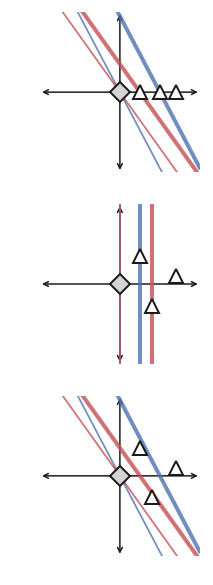

In [148]:
sns.set(style='ticks')

fig,ax = plt.subplots(figsize=(15,10))
ax = plt.subplot(331)
e1 = [2,1/(0.95)]
e2 = [4,1/(0.35)]
m1 = [0.25,0]
m2 = [0.5,0]
m3= [0.7,0]

fitness_surface(ax,e1,e2,m1,m2,m3)

ax = plt.subplot(334)

e1 = [0.25,np.inf]
e2 = [0.4,np.inf]
m1 = [0.25,0.35]
m2 = [0.4,-0.27]
m3= [0.7,0.1]

fitness_surface(ax,e1,e2,m1,m2,m3)

ax = plt.subplot(337)

e1 = [2,1/(0.95)]
e2 = [4,1/(0.35)]
m1 = [0.25,0.35]
m2 = [0.4,-0.27]
m3= [0.7,0.1]

fitness_surface(ax,e1,e2,m1,m2,m3)

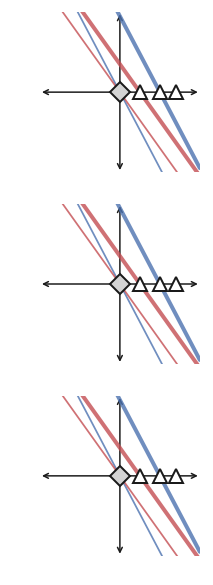

In [129]:
sns.set(style='ticks')

fig,ax = plt.subplots(figsize=(15,10))
ax = plt.subplot(331)




mutant_marker_style = dict(color='k', linestyle='None', marker='^',
                    markersize=14, markerfacecolor='white',markeredgewidth=2)
ancestor_marker_style = dict(color='k', linestyle='None', marker='D',
                    markersize=14, markerfacecolor='lightgray',markeredgewidth=2)

ax.annotate("", xy=(-limit, 0), xytext=(limit, 0),arrowprops=dict(arrowstyle="<->",linewidth=1.5),zorder=0)
ax.annotate("", xy=(0, -limit), xytext=(0, limit),arrowprops=dict(arrowstyle="<->",linewidth=1.5),zorder=1)

f = 0
a = blue_env_weights[0]
b = blue_env_weights[1]
plt.plot(np.linspace(-limit,limit),[f/b-a/b*x for x in np.linspace(-limit,limit)],color='b',alpha=0.8)
f = 1
plt.plot(np.linspace(-limit,limit),[f/b-a/b*x for x in np.linspace(-limit,limit)],color='b',linewidth=4,alpha=0.8)

f = 0
a = red_env_weights[0]
b = red_env_weights[1]
plt.plot(np.linspace(-limit,limit),[f/b-a/b*x for x in np.linspace(-limit,limit)],color='r',alpha=0.8)
f = 1
plt.plot(np.linspace(-limit,limit),[f/b-a/b*x for x in np.linspace(-limit,limit)],color='r',linewidth=4,alpha=0.8)

# ax.plot([-5,5],[0,0],'k',)

# ax.arrow(-5,0,10,0,arrowprops=dict(arrowstyle="<->"))
# ax.arrow(0,-5,0,10,arrowprops=dict(arrowstyle="<->"))

ax.plot(mutant1_phenotypes[0],mutant1_phenotypes[1],fillstyle='full',**mutant_marker_style)
ax.plot(mutant2_phenotypes[0],mutant2_phenotypes[1],fillstyle='full',**mutant_marker_style)
ax.plot(mutant3_phenotypes[0],mutant3_phenotypes[1],fillstyle='full',**mutant_marker_style)

ax.plot(0,0,fillstyle='full',**ancestor_marker_style)


ax.axis('off')

plt.xlim(-limit,limit)
plt.ylim(-limit,limit)

ax.set_aspect('equal')
ax.grid(True, which='both')
sns.despine(ax=ax, offset=0)


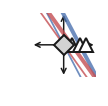

In [130]:
ax = plt.subplot(334)

mutant_marker_style = dict(color='k', linestyle='None', marker='^',
                    markersize=14, markerfacecolor='white',markeredgewidth=2)
ancestor_marker_style = dict(color='k', linestyle='None', marker='D',
                    markersize=14, markerfacecolor='lightgray',markeredgewidth=2)

ax.annotate("", xy=(-limit, 0), xytext=(limit, 0),arrowprops=dict(arrowstyle="<->",linewidth=1.5),zorder=0)
ax.annotate("", xy=(0, -limit), xytext=(0, limit),arrowprops=dict(arrowstyle="<->",linewidth=1.5),zorder=1)

f = 0
a = blue_env_weights[0]
b = blue_env_weights[1]
plt.plot(np.linspace(-limit,limit),[f/b-a/b*x for x in np.linspace(-limit,limit)],color='b',alpha=0.8)
f = 1
plt.plot(np.linspace(-limit,limit),[f/b-a/b*x for x in np.linspace(-limit,limit)],color='b',linewidth=4,alpha=0.8)

f = 0
a = red_env_weights[0]
b = red_env_weights[1]
plt.plot(np.linspace(-limit,limit),[f/b-a/b*x for x in np.linspace(-limit,limit)],color='r',alpha=0.8)
f = 1
plt.plot(np.linspace(-limit,limit),[f/b-a/b*x for x in np.linspace(-limit,limit)],color='r',linewidth=4,alpha=0.8)

# ax.plot([-5,5],[0,0],'k',)

# ax.arrow(-5,0,10,0,arrowprops=dict(arrowstyle="<->"))
# ax.arrow(0,-5,0,10,arrowprops=dict(arrowstyle="<->"))

ax.plot(mutant1_phenotypes[0],mutant1_phenotypes[1],fillstyle='full',**mutant_marker_style)
ax.plot(mutant2_phenotypes[0],mutant2_phenotypes[1],fillstyle='full',**mutant_marker_style)
ax.plot(mutant3_phenotypes[0],mutant3_phenotypes[1],fillstyle='full',**mutant_marker_style)

ax.plot(0,0,fillstyle='full',**ancestor_marker_style)


ax.axis('off')

plt.xlim(-limit,limit)
plt.ylim(-limit,limit)

ax.set_aspect('equal')
ax.grid(True, which='both')
sns.despine(ax=ax, offset=0)